In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC




   encounterId  end_tidal_co2  feed_vol  feed_vol_adm  fio2  fio2_ratio  \
0          666            NaN       NaN           NaN   NaN         NaN   
1          795            NaN       NaN           NaN   NaN         NaN   
2          822            NaN       NaN           NaN   NaN         NaN   
3          832            NaN       NaN           NaN   NaN         NaN   
4          837            NaN       NaN           NaN   NaN         NaN   

   insp_time  oxygen_flow_rate  peep  pip  resp_rate  sip  tidal_vol  \
0        NaN               NaN   NaN  NaN        NaN  NaN        NaN   
1        NaN               NaN   NaN  NaN        NaN  NaN        NaN   
2        NaN               NaN   NaN  NaN        NaN  NaN        NaN   
3        NaN               NaN   NaN  NaN        NaN  NaN        NaN   
4        NaN               NaN   NaN  NaN        NaN  NaN        NaN   

   tidal_vol_actual  tidal_vol_kg  tidal_vol_spon  bmi  referral  
0               NaN           NaN             NaN

For data preperation purposes 0's are not helpful in certain columns as they are invalid entries for a human body, these columns have been grouped in the 'nozeros' array.

To visualise how many data entries have invalid data entries a for loop is used to change 0's to numpys Not a Number (NaN) and then displayed on a graph and in table format.

OLD:     encounterId  end_tidal_co2  feed_vol  feed_vol_adm  fio2  fio2_ratio  \
0          666            NaN       NaN           NaN   NaN         NaN   
1          795            NaN       NaN           NaN   NaN         NaN   
2          822            NaN       NaN           NaN   NaN         NaN   
3          832            NaN       NaN           NaN   NaN         NaN   
4          837            NaN       NaN           NaN   NaN         NaN   

   insp_time  oxygen_flow_rate  peep  pip  resp_rate  sip  tidal_vol  \
0        NaN               NaN   NaN  NaN        NaN  NaN        NaN   
1        NaN               NaN   NaN  NaN        NaN  NaN        NaN   
2        NaN               NaN   NaN  NaN        NaN  NaN        NaN   
3        NaN               NaN   NaN  NaN        NaN  NaN        NaN   
4        NaN               NaN   NaN  NaN        NaN  NaN        NaN   

   tidal_vol_actual  tidal_vol_kg  tidal_vol_spon  bmi  referral  
0               NaN           NaN          

end_tidal_co2       0
feed_vol            0
feed_vol_adm        0
fio2                0
fio2_ratio          0
insp_time           0
oxygen_flow_rate    0
peep                0
pip                 0
resp_rate           0
tidal_vol           0
tidal_vol_actual    0
tidal_vol_kg        0
tidal_vol_spon      0
bmi                 0
referral            0
dtype: int64

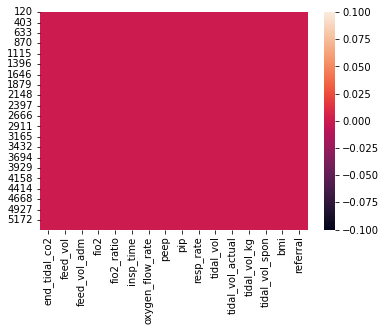

In [21]:
df = pd.read_csv(
    r'/Users/ashleypearson/Documents/UWE/Year Two/Semester 2/Machine Learning/FeedingDashboarddata.csv')
print("OLD: ",df.head())

df=df.drop(['encounterId','sip'],axis=1)
df=df.dropna(axis=0, thresh=7)
print("Please make it stop...")
print("NEW: ",df.head())
for feature in df:
    df[feature] = df[feature].replace(np.nan,0)
sns.heatmap(df.isnull())
print ("Total size of data: ",len(df))
print("Total null values per column:")
df.isnull().sum()


In [8]:
# for feature in nozeros:
#     df[feature] = df[feature].replace(0, np.nan)
#     average = df[feature].mean(skipna=True)
#     df[feature] = df[feature].replace(np.nan, average)
# print("Total null values per column:")
# df.isnull().sum()


In [9]:
x = df.drop(columns='referral', axis=1)


y = df["referral"]
print("Shape of X data:\n ", x.head())
print("Shape of Y data:\n ", y.head())

scaler = StandardScaler()

scaler.fit(x)
standardizeddata = scaler.transform(x)
x = standardizeddata



print("Line one of the X dataset to confirm values have been scaled: ")
print(x[0])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=33)

print("X shape: ", x.shape, "X Train shape: ",
      x_train.shape, "X Test shape: ", x_test.shape)

print(y.sum())


Shape of X data:
     encounterId  end_tidal_co2  feed_vol  feed_vol_adm  fio2  fio2_ratio  \
0          666            0.0       0.0           0.0   0.0         0.0   
1          795            0.0       0.0           0.0   0.0         0.0   
2          822            0.0       0.0           0.0   0.0         0.0   
3          832            0.0       0.0           0.0   0.0         0.0   
4          837            0.0       0.0           0.0   0.0         0.0   

   insp_time  oxygen_flow_rate  peep  pip  resp_rate  sip  tidal_vol  \
0        0.0               0.0   0.0  0.0        0.0  0.0        0.0   
1        0.0               0.0   0.0  0.0        0.0  0.0        0.0   
2        0.0               0.0   0.0  0.0        0.0  0.0        0.0   
3        0.0               0.0   0.0  0.0        0.0  0.0        0.0   
4        0.0               0.0   0.0  0.0        0.0  0.0        0.0   

   tidal_vol_actual  tidal_vol_kg  tidal_vol_spon  bmi  
0               0.0           0.0       

In [10]:
param_grid = {'C': [0.0001,0.01, 0.1, 1, 10, 100, 1000,100000], 'gamma': [
0.001, 0.1, 1,10], 'kernel': ['rbf']}
gridsearch = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

gridsearch.fit(x_train, y_train)

bestparams=gridsearch.best_estimator_

grid_predictions = gridsearch.predict(x_test)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.0001, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ..................C=0.0001, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ..................C=0.0001, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ..................C=0.0001, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ..................C=0.0001, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.0001, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.0001, gamma=

The results of the best parameters can then be printed out using classification report 

The confusion matrix also shows the predicted outcomes vs the actual outcome.

Even with the best peforming parameters it is clear viewing the f1-scores that the model is good at predicting negative cases but less favourable at correctly predicting diabetes, scoring a high number of false negatives.

In [11]:
print(gridsearch.best_estimator_)
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

SVC(C=1000, gamma=0.001)
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       758
         1.0       0.80      0.53      0.64       320

    accuracy                           0.82      1078
   macro avg       0.81      0.74      0.76      1078
weighted avg       0.82      0.82      0.81      1078

[[716  42]
 [151 169]]
